In [1]:
import pandas as pd

#### 1.Data Processing

In [2]:
# a) Import the data: Only keep numeric data
data=pd.read_csv('ProviderInfo.csv')

In [3]:
data=data.select_dtypes(include=['float64'])

In [4]:
data=data.drop(columns=['PHONE','COUNTY_SSA'])

In [5]:
data.shape

(15617, 28)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15617 entries, 0 to 15616
Data columns (total 28 columns):
ZIP                   15616 non-null float64
BEDCERT               15616 non-null float64
RESTOT                15105 non-null float64
OVERALL_RATING        15436 non-null float64
SURVEY_RATING         15436 non-null float64
QUALITY_RATING        15403 non-null float64
STAFFING_RATING       15268 non-null float64
RN_STAFFING_RATING    15268 non-null float64
AIDHRD                14670 non-null float64
VOCHRD                14670 non-null float64
RNHRD                 14670 non-null float64
TOTLICHRD             14670 non-null float64
TOTHRD                14670 non-null float64
PTHRD                 14670 non-null float64
EXP_AIDE              14670 non-null float64
EXP_LPN               14670 non-null float64
EXP_RN                14670 non-null float64
EXP_TOTAL             14670 non-null float64
ADJ_AIDE              14560 non-null float64
ADJ_LPN               14560 non-null

In [7]:
# b) Clean Nan and NaT values
data=data.dropna()

In [8]:
data.shape

(14557, 28)

In [9]:
# c) Split into train / test set using an 80/20 split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['OVERALL_RATING']), data['OVERALL_RATING'], test_size = 0.2, random_state = 101)

In [10]:
# d) Scale X_train data properly (Do not scale the Target Variable)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train_scaled.shape

(11645, 27)

In [11]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled=scaler.transform(X_test)
X_test_scaled.shape

(2912, 27)

#### 2. Model #1: Logistic Regression

In [12]:
# a) Using LogisticRegression(), build a model to predict the "OVERALL_RATING".

#Training the Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train_scaled, y_train) 

#Use the model to predict on test data

y_pred = classifier.predict(X_test_scaled)

/Users/yangxiang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
# b) For error evaluation, start by calculating the score (returns the mean accuracy).
classifier.score(X_test_scaled,y_test)

0.8461538461538461

In [14]:
# c) Calculate the confusion matrix and classification report for the test data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[265,  80,   0,   0,   0],
       [ 71, 458,  77,   0,   0],
       [  0,  39, 362,  80,   0],
       [  0,   0,  23, 563,  54],
       [  0,   0,   0,  24, 816]])

In [15]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.79      0.77      0.78       345
         2.0       0.79      0.76      0.77       606
         3.0       0.78      0.75      0.77       481
         4.0       0.84      0.88      0.86       640
         5.0       0.94      0.97      0.95       840

    accuracy                           0.85      2912
   macro avg       0.83      0.83      0.83      2912
weighted avg       0.84      0.85      0.84      2912



###### d) Based on the confusion matrix and classification report, do any of the classes get predicted exceptionally poorly? 
Yes, rating 1 was predicted as rating 2 has 80 times, rating 3 was predicted as rating 4 80 times , and rating 2 was predicted as rating 3 33 times. It does not look that accurate and definitely can be improved.

One of the possibility is that the threshold(cutting point) in the logistic regression is not well designed so it mis classify some of the datas to the wrong groups.

Also the multinomial logistic regression itself is hard to predict.

In [16]:
# e) Calculate predictions for the training data & build the confusion matrix and classification report. Are there signs of overfitting? Why or why not?
y_pred_train = classifier.predict(X_train_scaled)
confusion_matrix(y_train, y_pred_train)

array([[1060,  294,    0,    0,    0],
       [ 236, 1764,  292,    0,    0],
       [   0,  271, 1379,  262,    0],
       [   0,    0,   90, 2409,  179],
       [   0,    0,    0,   99, 3310]])

In [17]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         1.0       0.82      0.78      0.80      1354
         2.0       0.76      0.77      0.76      2292
         3.0       0.78      0.72      0.75      1912
         4.0       0.87      0.90      0.88      2678
         5.0       0.95      0.97      0.96      3409

    accuracy                           0.85     11645
   macro avg       0.84      0.83      0.83     11645
weighted avg       0.85      0.85      0.85     11645



Arrording to the classification report, the precision between the training and testing is not that different, which mean that I did not see a nig drop between train and test in terms of the precicison for different levels.

Thus, I do not think this shows the sign of overfitting.

In [18]:
# f) Print out an example of the predicted probability. There is a method called .predict_proba() which can be used for estimating these values on the test set.
classifier.predict_proba(X_test_scaled)

array([[6.64956919e-25, 2.85724559e-17, 1.31164697e-09, 1.18479035e-03,
        9.98815208e-01],
       [9.01301311e-15, 1.84239764e-09, 4.12251807e-04, 6.17654616e-01,
        3.81933131e-01],
       [2.11268282e-01, 6.69936027e-01, 1.18792947e-01, 2.74371029e-06,
        1.38983132e-14],
       ...,
       [4.04420041e-11, 1.20588104e-06, 1.96162324e-02, 9.37800162e-01,
        4.25823994e-02],
       [2.87789071e-01, 7.09026744e-01, 3.18412251e-03, 6.24847050e-08,
        1.11298231e-14],
       [3.60772692e-03, 7.94676456e-01, 1.99984151e-01, 1.73149721e-03,
        1.68279821e-07]])

#### 3. Model #2: PCA(n_components = 2) + Logistic Regression

In [19]:
# a) Pick up from step d in Problem 1 (use the same data that has been scaled): We will now transform the X_train & X_test data using PCA with 2 components.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca_2 = pca.fit_transform(X_train_scaled)
X_test_pca_2 = pca.transform(X_test_scaled)

In [20]:
# b) Then use the transformed data (X_train_pca_2) to fit a Logistic Regression model
#Training the Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train_pca_2, y_train) 

#Use the model to predict on test data

y_pred_pca_2 = classifier.predict(X_test_pca_2)

In [21]:
# c) Calculate the confusion matrix and classification report for the test data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_pca_2)

array([[138, 164,   1,  25,  17],
       [120, 250,   0,  50, 186],
       [ 51, 186,   1,  62, 181],
       [ 18, 145,   0,  71, 406],
       [ 10, 118,   0,  76, 636]])

In [22]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pca_2))

              precision    recall  f1-score   support

         1.0       0.41      0.40      0.40       345
         2.0       0.29      0.41      0.34       606
         3.0       0.50      0.00      0.00       481
         4.0       0.25      0.11      0.15       640
         5.0       0.45      0.76      0.56       840

    accuracy                           0.38      2912
   macro avg       0.38      0.34      0.29      2912
weighted avg       0.37      0.38      0.32      2912



In [23]:
# d) Calculate predictions for the training data & build the confusion matrix and classification report. Are there signs of overfitting? Why or why not?
y_pred_train_pca_2 = classifier.predict(X_train_pca_2)
confusion_matrix(y_train, y_pred_train_pca_2)

array([[ 552,  639,    3,   85,   75],
       [ 381, 1045,    3,  263,  600],
       [ 154,  794,    2,  286,  676],
       [  96,  661,    0,  324, 1597],
       [  36,  454,    3,  289, 2627]])

In [24]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train_pca_2))

              precision    recall  f1-score   support

         1.0       0.45      0.41      0.43      1354
         2.0       0.29      0.46      0.36      2292
         3.0       0.18      0.00      0.00      1912
         4.0       0.26      0.12      0.17      2678
         5.0       0.47      0.77      0.58      3409

    accuracy                           0.39     11645
   macro avg       0.33      0.35      0.31     11645
weighted avg       0.34      0.39      0.33     11645



According to the report, the precision between test and training are relatively low, also the precision itself are low, thus I think there is no sigh of overfitting

###### e) How well does this model perform relative to Model #1? Explain why there is a shift in performance. 
It actually preforman worse than Model 1, I think it is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature has large variance as important features, but the feature has large variance can have noting to do with the prediction target.

This means,we can produce a lot of useless features and eliminate useful features after PCA, PCA is agnostic to  y.



#### 4. Model #3: PCA(n_components = 16) + Logistic Regression


In [25]:
# a) Pick up from step d in Problem 1 (use the same data that has been scaled): We will now transform the X_train & X_test data using PCA with 16 components. 
from sklearn.decomposition import PCA

pca = PCA(n_components = 16)
X_train_pca_16 = pca.fit_transform(X_train_scaled)
X_test_pca_16 = pca.transform(X_test_scaled)

In [26]:
# b) Then use the transformed data (X_train_pca_16) to fit a Logistic Regression model.
#Training the Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train_pca_16, y_train) 

#Use the model to predict on test data

y_pred_pca_16 = classifier.predict(X_test_pca_16)

/Users/yangxiang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
# c) Calculate the confusion matrix and classification report for the test data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_pca_16)

array([[262,  83,   0,   0,   0],
       [ 63, 470,  73,   0,   0],
       [  0,  31, 366,  84,   0],
       [  0,   0,  26, 550,  64],
       [  0,   0,   0,  31, 809]])

In [28]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pca_16))

              precision    recall  f1-score   support

         1.0       0.81      0.76      0.78       345
         2.0       0.80      0.78      0.79       606
         3.0       0.79      0.76      0.77       481
         4.0       0.83      0.86      0.84       640
         5.0       0.93      0.96      0.94       840

    accuracy                           0.84      2912
   macro avg       0.83      0.82      0.83      2912
weighted avg       0.84      0.84      0.84      2912



In [29]:
# d) Calculate predictions for the training data & build the confusion matrix and classification report. Are there signs of overfitting? Why or why not?
y_pred_train_pca_16 = classifier.predict(X_train_pca_16)
confusion_matrix(y_train, y_pred_train_pca_16)

array([[1051,  303,    0,    0,    0],
       [ 229, 1797,  265,    1,    0],
       [   0,  240, 1431,  241,    0],
       [   0,    0,  140, 2314,  224],
       [   0,    0,    0,  191, 3218]])

In [30]:
# Build the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train_pca_16))

              precision    recall  f1-score   support

         1.0       0.82      0.78      0.80      1354
         2.0       0.77      0.78      0.78      2292
         3.0       0.78      0.75      0.76      1912
         4.0       0.84      0.86      0.85      2678
         5.0       0.93      0.94      0.94      3409

    accuracy                           0.84     11645
   macro avg       0.83      0.82      0.83     11645
weighted avg       0.84      0.84      0.84     11645



Arrording to the classification report, the precision between the training and testing is not that different, which mean that I did not see a nig drop between train and test in terms of the precicison for different levels.

Thus, I do not think this shows the sign of overfitting.

#### 5.Conceptual Questions:

###### a) In order to better understand what is happening in Model 2 & Model 3, rerun PCA without specifying a number of components. Plot out the cumulative explained variance ratio vs number of components for the original scaled data. Describe what the plot is showing as well as what the cumulative explained variance tells us about our data.


In [31]:
# Rerun PCA without specifying a number of components.
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.23164435, 0.38192088, 0.50227207, 0.60002066, 0.67148358,
       0.71896401, 0.76046329, 0.79787776, 0.82987261, 0.85669036,
       0.88250227, 0.90741773, 0.92998149, 0.95158734, 0.97008799,
       0.98608693, 0.99188301, 0.99525409, 0.99789404, 0.99926093,
       0.99975565, 0.99996093, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [32]:
import seaborn as sns
df = pd.DataFrame({'Variance Explained':pca.explained_variance_ratio_,
             'Principal Components':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27']})
sns.barplot(x='Principal Components',y="Variance Explained", 
           data=df, color="c");

In [33]:
Cumulative_Explained_Variance_Ratio=pca.explained_variance_ratio_.cumsum(),
Principal_Components=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27']

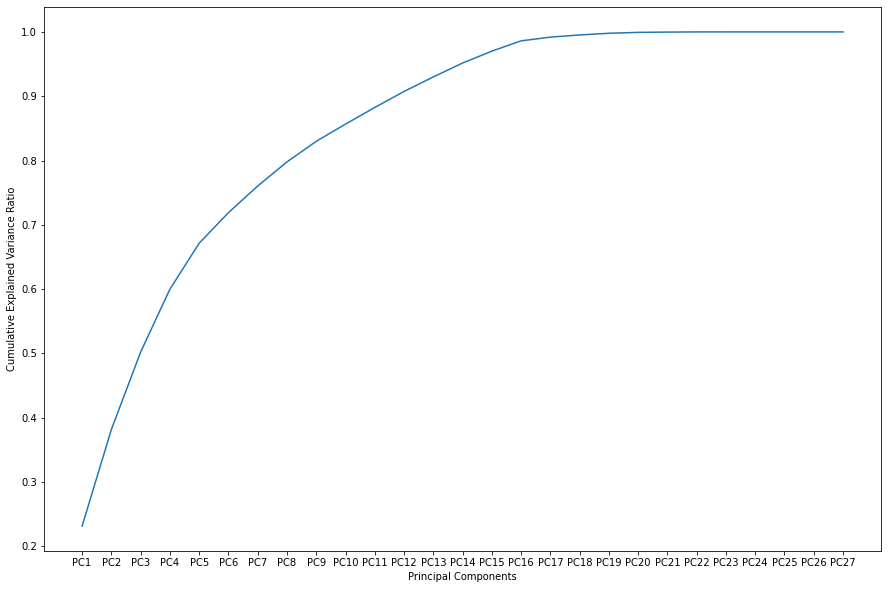

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(Principal_Components,list(Cumulative_Explained_Variance_Ratio[0]))
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

The plot shows that in order to get 80% of the Cumulative Explained Variance, we need at least 9 PCAs, with 16 PCAs we can reach 98.6% of Cumulative Explained Variance, compare of the original 27 features, it is already big improvent in terms of the Dimension reduction.

###### b) Between Model 2 and Model 3, which performed the best? Explain why this is.
Model 3 performed the best, first of all, from the confusion matrix and classification report, we can see that Model 3 have a much higer accuracy rate, also according to Cumulative_Explained_Variance_Ratio plot, we can see that with the model have only 2 PCAs, the Cumulative Explained Variance Ratio can only goes to 0.38192088, which is far away from the accuray that we are typically looking for. 

Thuse, Model 3 performed better than Model 2

###### c) Assuming you are working with a company on a modeling project with a massive data set, what would be some of the benefits of utilizing PCA? 

1. Removes Correlated Features: In a real world scenario, this is very common that you get thousands of features in your dataset. You cannot run your algorithm on all the features as it will reduce the performance of your algorithm and it will not be easy to visualize that many features in any kind of graph. So, you MUST reduce the number of features in your dataset. 
After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them.

2. Improves Algorithm Performance: With so many features, the performance of your algorithm will drastically degrade. PCA is a very common way to speed up your Machine Learning algorithm by getting rid of correlated variables which don't contribute in any decision making. The training time of the algorithms reduces significantly with less number of features.
So, if the input dimensions are too high, then using PCA to speed up the algorithm is a reasonable choice. 

3. Reduces Overfitting: Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

4. Improves Visualization: It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily. 
We can use 2D Scree Plot to see which Principal Components result in high variance and have more impact as compared to other Principal Components. 




###### d) Now argue the opposite of question 3 - what is a negative result of utilizing this  dimensionality reduction technique?
1. Independent variables become less interpretable: After implementing PCA on the dataset, your original features will turn into Principal Components. Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features.

2. Data standardization is must before PCA: You must standardize your data before implementing PCA, otherwise PCA will not be able to find the optimal Principal Components. 
Also, for standardization, all the categorical features are required to be converted into numerical features before PCA can be applied.
PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler from Scikit Learn to standardize the dataset features onto unit scale (mean = 0 and standard deviation = 1) which is a requirement for the optimal performance of many Machine Learning algorithms.

3. Information Loss: Although Principal Components try to cover maximum variance among the features in a dataset, if we don't select the number of Principal Components with care, it may miss some information as compared to the original list of features.

###### e) sklearn offers a variety of methods to solve a multiclass logistic regression problem. One option is the "one-vs-the-rest" (also known as "one-vs-all" method). Explain in detail what this process does.

In one-vs-rest logistic regression (OVR) a separate model is trained for each class predicted whether an observation is that class or not (thus making it a binary classification problem). It assumes that each classification problem (e.g. class 0 or not) is independent.A binary problem is fit for each label. 

###### f) Each of the three models utilized logistic regression. The Hands-On ML book describes the logistic function (sometimes called the sigmoid function) in detail. Using Equation 4-14, plot out the logistic function & describe why it is useful in classification problems of the nature covered in this homework assignment.

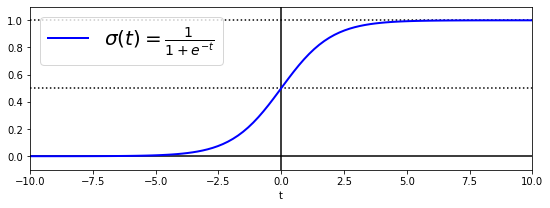

In [122]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

# 

For the nature covered in this homework assignment, the predicted variable overall rating to the other features is somehow a generalized model. Using Linear regression will not make sense here since we are predicting the Rating, and there are only 5 level of ratings. Using logistic function to create a GLM model will help us to classify Categorical variable in a more clear and convient way.